# Predicting scores of IPL matches.

Importing the necessary libraries.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now let us read the csv file.

In [51]:
df = pd.read_csv('ipl_data.csv')
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


Next let us check the data types of the columns.

In [52]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

Next we have to check for any possible null values.

In [53]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

It could be noted that there are several irrelevant columns in this data frame. These could be dropped off from the data frame.

In [54]:
df = df.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'],axis=1)
df

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


Next let us define our input and output features.

In [55]:
x = df.drop(['total'], axis=1) # all columns except the total column
y = df['total'] # the target feature is the total column

In [56]:
from sklearn.preprocessing import LabelEncoder

encoded_venue = LabelEncoder()
encoded_batting_team = LabelEncoder()
encoded_bowling_team = LabelEncoder()
encoded_striker = LabelEncoder()
encoded_bowler = LabelEncoder()

x['venue'] = encoded_venue.fit_transform(x['venue'])
x['bat_team'] = encoded_batting_team.fit_transform(x['bat_team'])
x['bowl_team'] = encoded_bowling_team.fit_transform(x['bowl_team'])
x['batsman'] = encoded_striker.fit_transform(x['batsman'])
x['bowler'] = encoded_bowler.fit_transform(x['bowler'])

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

To ensure that all out inputs are on the same scaling standard, we can use MinMaxScaler to set a scale.

In [58]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)

Let us define the structure of the Artificial Neural Network

In [59]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [60]:
model = keras.Sequential([
    keras.layers.Input( shape=(x_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer 
    keras.layers.Dropout(0.3),  # Dropout layer
    keras.layers.Dense(216, activation='relu'),  # Hidden layer 
    keras.layers.Dense(1, activation='linear')  # Output layer 
])

Let us compile the neural network model using the Huber loss metric.

In [61]:
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 216)            │       110,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           217 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,293 (1.31 MB)

 Trainable params: 114,097 (445.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 228,196 (891.39 KB)

Now the model is ready to be trained.

In [62]:
model.fit(x_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(x_test_scaled, y_test))

Epoch 1/50


951/951 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.2734 - val_loss: 22.4361
Epoch 2/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.6269 - val_loss: 22.4797
Epoch 3/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.7393 - val_loss: 22.3920
Epoch 4/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.7034 - val_loss: 22.1654
Epoch 5/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.6244 - val_loss: 22.2730
Epoch 6/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.7578 - val_loss: 22.1390
Epoch 7/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.5822 - val_loss: 22.0671
Epoch 8/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.5682 - val_loss: 22.2898
Epoch 9/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.5455 - val_loss: 22.1042
Epoch 10/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.6100 - val_loss: 22.1658
Epoch 11/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.7375 - val_loss: 22.2376
Epoch 12/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

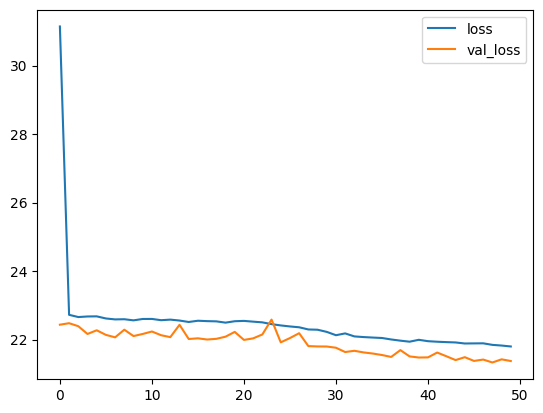

In [63]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

Now let us test the model with the testing data.

In [68]:
predictions = model.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')


476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
Mean Absolute Error: 21.86783813484592


Let us create an interactive interface to run the prediction.

In [70]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Batsman:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score!")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
         
 
        # Decode the encoded values back to their original values
        decoded_venue = encoded_venue.transform([venue.value])
        decoded_batting_team = encoded_batting_team.transform([batting_team.value])
        decoded_bowling_team = encoded_bowling_team.transform([bowling_team.value])
        decoded_striker = encoded_striker.transform([striker.value])
        decoded_bowler = encoded_bowler.transform([bowler.value])
 
 
        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = min_max_scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
 
        print(predicted_score)

predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Batsman:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score!', style=ButtonStyle())

Output()